# Networking graph notebook

This notebook is used to create graphs from the networking results

In [104]:
# Imports
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [105]:
# Global variables
path_to_graphs = "graphs/"
path_to_results = "results/"

## Single connection with idle devices connected to the medium

This experiment has for purpose to see if the presence of several devices connected to the devices has an impact on the quality of the communication between 2 devices over a simple connection. This is to measure the interference with idle devices

### Bandwidth

In [106]:
def generate_idle_bandwidth_graph(input_file, output_file, network_medium, save=False):
    # Generate graph
    df = pd.read_csv(path_to_results + input_file)

    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    sns.boxplot(data=df, x='n_devices', y='bandwidth_mbits_sec', hue='dev_types_send_recv', palette='Dark2')
    plt.title(f"Bandwidth for a single connection over {network_medium}\nfor an increasing number of idle devices connected to the network medium.")
    plt.xlabel('Total number of devices connected to the network medium')
    plt.ylabel('Bandwidth (in Mbits/sec)')
    plt.legend(title='Type of device (sender-receiver)')
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.tight_layout()

    if save:
        if not os.path.exists(path_to_graphs):
            os.makedirs(path_to_graphs)
        plt.savefig(os.path.join(path_to_graphs, output_file + ".pdf"))
        plt.savefig(os.path.join(path_to_graphs, output_file + ".png"))

    plt.show()

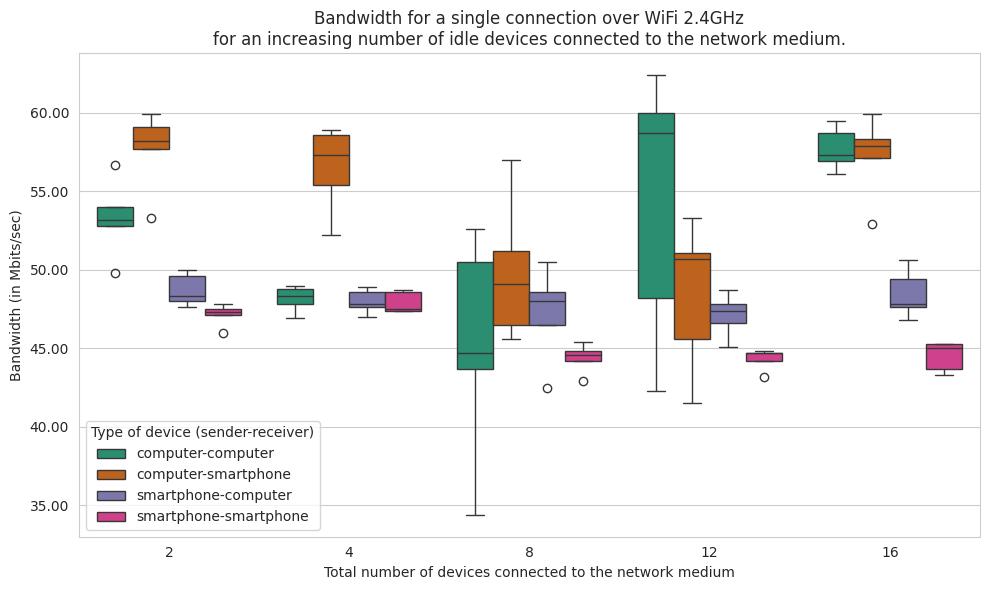

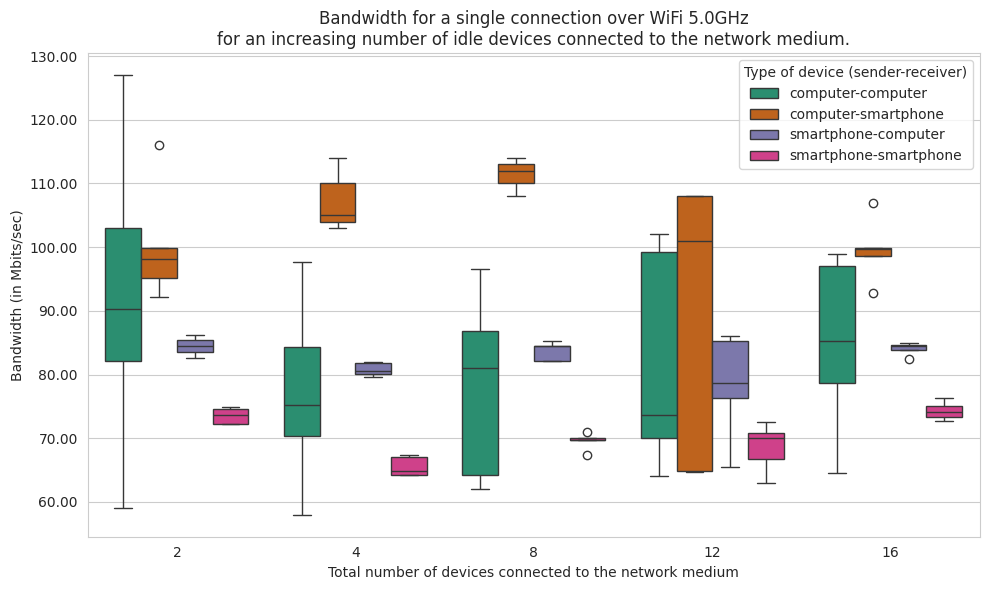

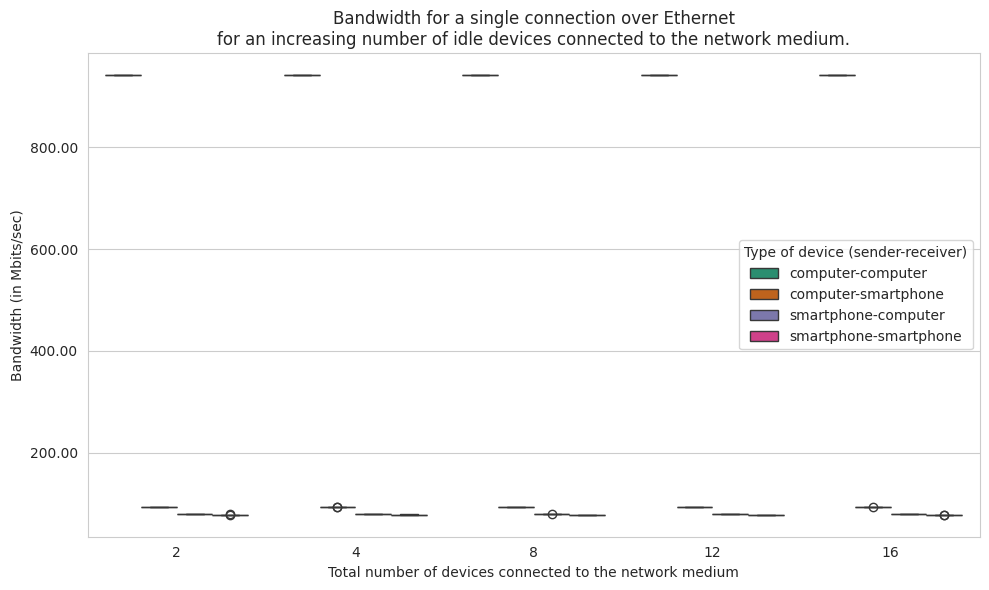

In [107]:
# Generate graphs
save=True
network_mediums = ["WiFi 2.4GHz", "WiFi 5.0GHz", "Ethernet"]
network_mediums_raw = ["wifi_2_4", "wifi_5_0", "ethernet"]
input_files = []
output_files = []
for nm in network_mediums_raw:
    in_f = "simple_bandwidth_btw_2_devices_" + nm + "_results.csv"
    ou_f = "bandwidth_with_increasing_idle_devices_over_" + nm + "_graph"
    input_files.append(in_f)
    output_files.append(ou_f)

for i in range(len(network_mediums)):
    generate_idle_bandwidth_graph(input_files[i], output_files[i], network_mediums[i], save)

### Latency

#### With increasing number of devices connected

In [108]:
def generate_idle_latency_graph(input_file, output_file, network_medium, save=False):
    # Generate graph
    df = pd.read_csv(path_to_results + input_file)

    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    sns.boxplot(data=df, x='n_devices', y='latency_ms', hue='dev_types_send_recv', palette='Dark2')
    plt.title(f"Latency over a single conenction over {network_medium}\nfor an increasing number of idle devices connected to the network medium.")
    plt.xlabel('Total number of devices connected to the network medium')
    plt.ylabel('Latency (in ms)')
    plt.legend(title='Type of device (sender-receiver)')
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.tight_layout()

    if save:
        if not os.path.exists(path_to_graphs):
            os.makedirs(path_to_graphs)
        plt.savefig(os.path.join(path_to_graphs, output_file + ".pdf"))
        plt.savefig(os.path.join(path_to_graphs, output_file + ".png"))

    plt.show()

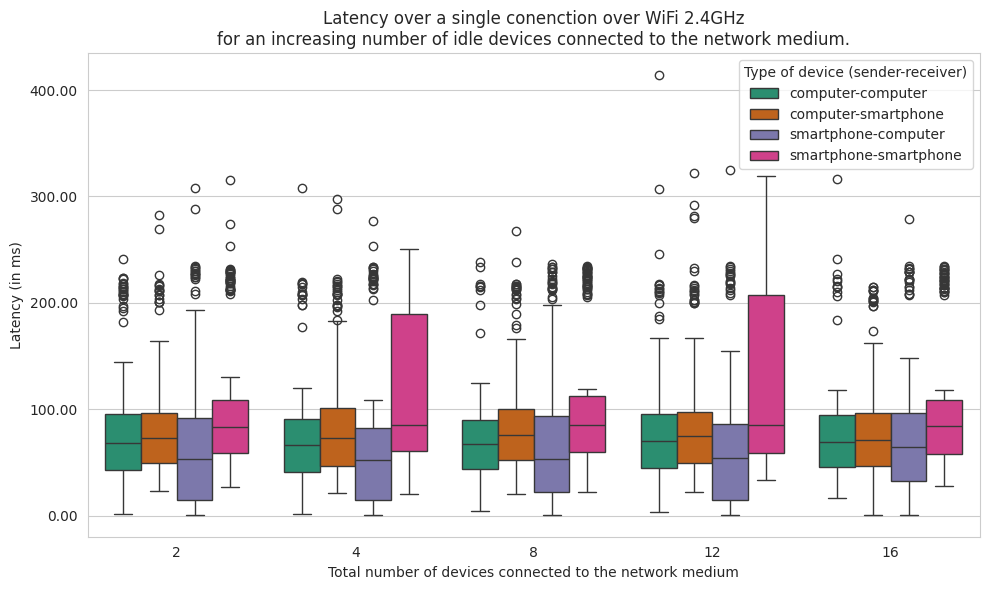

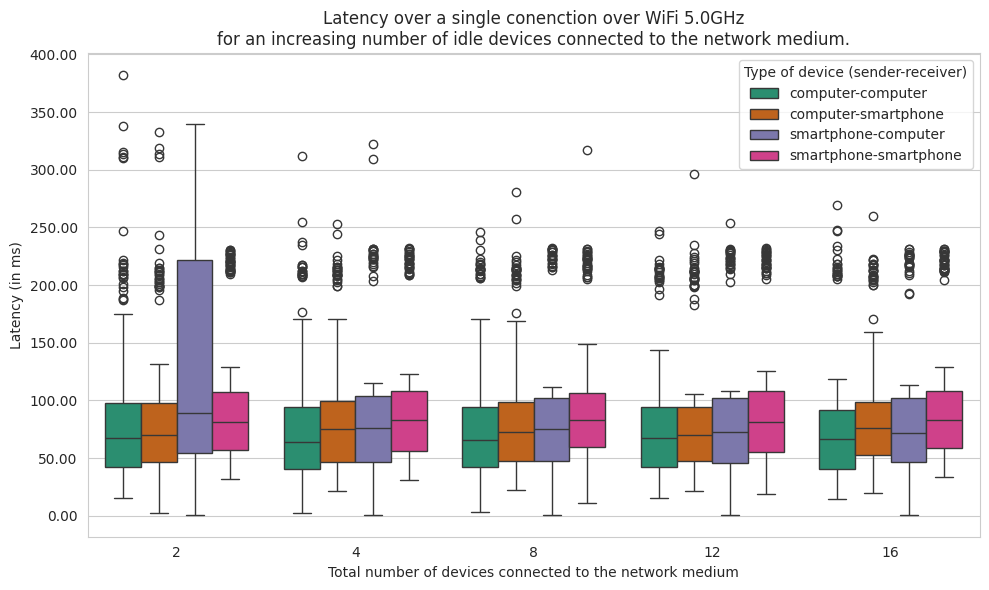

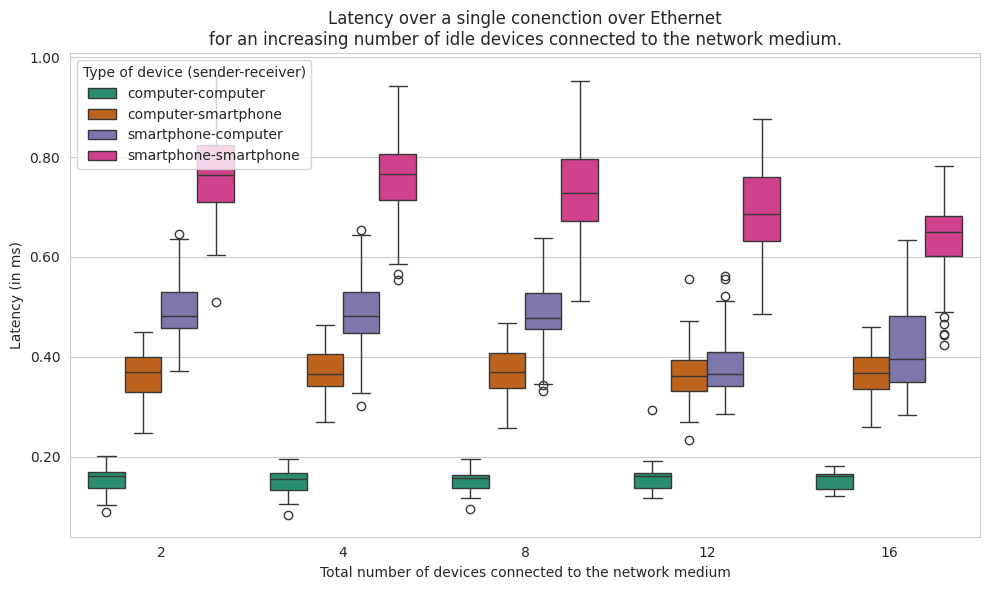

In [109]:
# Generate graphs
save=True
network_mediums = ["WiFi 2.4GHz", "WiFi 5.0GHz", "Ethernet"]
network_mediums_raw = ["wifi_2_4", "wifi_5_0", "ethernet"]
input_files = []
output_files = []
for nm in network_mediums_raw:
    in_f = "simple_latency_inc_dev_" + nm + "_results.csv"
    ou_f = "latency_with_increasing_idle_device_over_" + nm + "_graph"
    input_files.append(in_f)
    output_files.append(ou_f)

for i in range(len(network_mediums)):
    generate_idle_latency_graph(input_files[i], output_files[i], network_mediums[i], save)

#### With increasing ping interval

This version of the experiment was done because of observation of better latency for shorter ping interval when the medium is a smartphone "hotspot". This seems to not be the case with a real WiFi modem.

In [110]:
def generate_idle_latency_graph(input_file, output_file, network_medium, save=False, showfliers=True):
    # Generate graph
    df = pd.read_csv(path_to_results + input_file)

    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    sns.boxplot(data=df, x='ping_inter', y='latency_ms', hue='dev_types_send_recv', palette='Dark2', showfliers=showfliers)
    plt.title(f"Latency over a single connection over {network_medium}\nfor an increasing interval between ping with 4 devices connected to the network medium (2 idle and 2 active).")
    plt.xlabel('The interval between pings (in seconds)')
    plt.ylabel('Latency (in ms)')
    plt.legend(title='Type of device (sender-receiver)')
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.tight_layout()

    if save:
        if not os.path.exists(path_to_graphs):
            os.makedirs(path_to_graphs)
        plt.savefig(os.path.join(path_to_graphs, output_file + ".pdf"))
        plt.savefig(os.path.join(path_to_graphs, output_file + ".png"))

    plt.show()

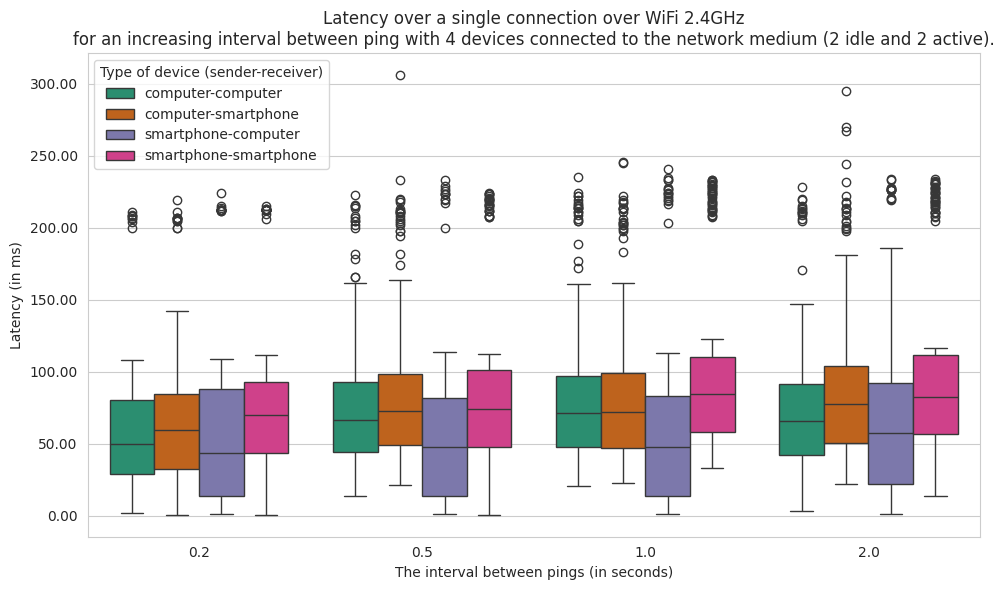

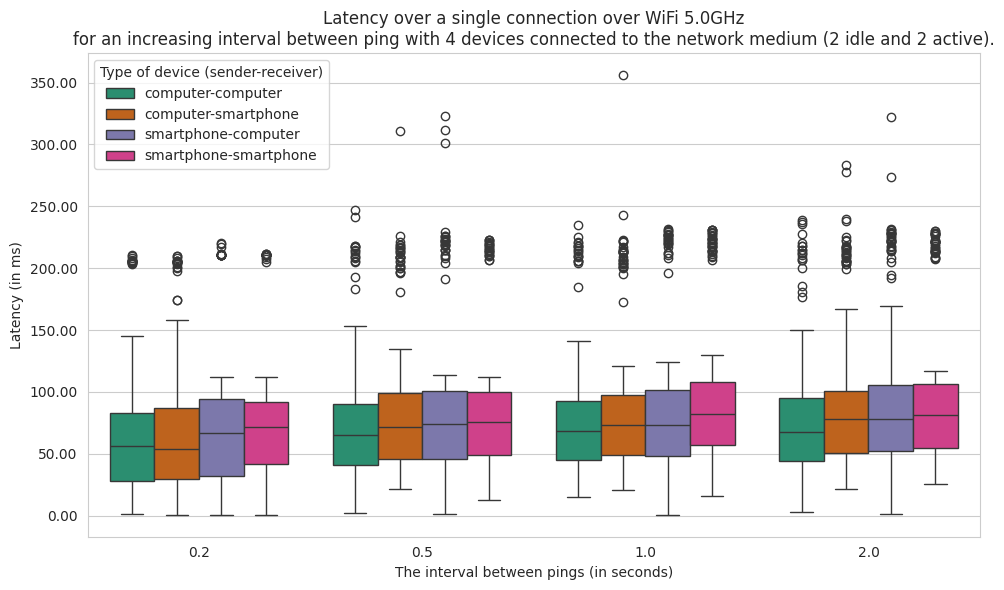

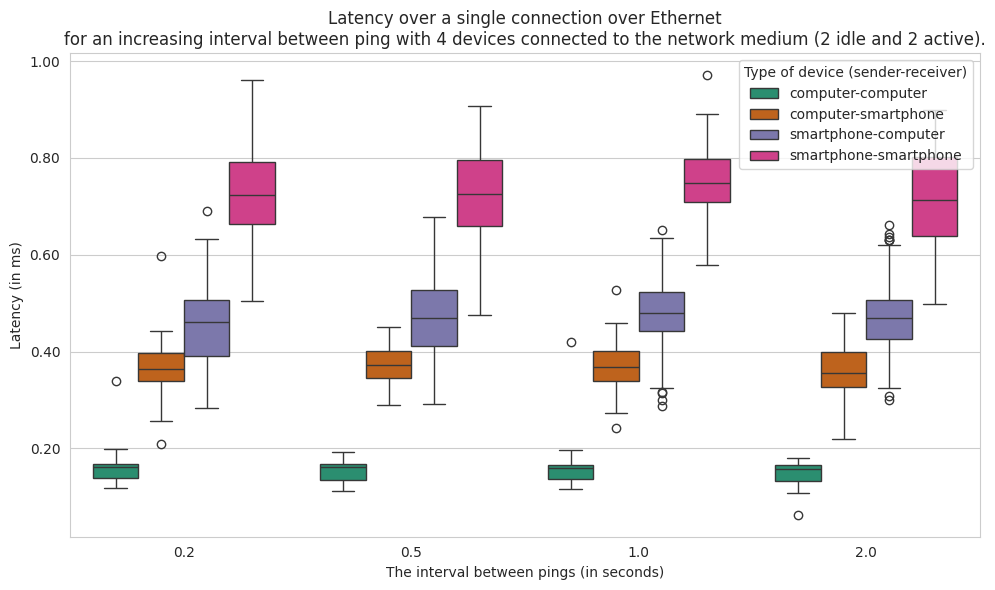

In [111]:
# Generate graphs
save=True
showfliers=True
network_mediums = ["WiFi 2.4GHz", "WiFi 5.0GHz", "Ethernet"]
network_mediums_raw = ["wifi_2_4", "wifi_5_0", "ethernet"]
input_files = []
output_files = []
for nm in network_mediums_raw:
    in_f = "simple_latency_inc_ping_" + nm + "_results.csv"
    ou_f = "latency_with_increasing_ping_interval_and_constant_idle_device_over_" + nm + "_graph"
    input_files.append(in_f)
    output_files.append(ou_f)

for i in range(len(network_mediums)):
    generate_idle_latency_graph(input_files[i], output_files[i], network_mediums[i], save, showfliers)

## Multiple one to one connections over same network medium

This experiment has for purpose to characterize multiple connections between several devices. Each device has only a single connection and is either a sender or a receiver.

### Bandwidth

#### Average bandwidth

In [112]:
def generate_mutliple_connections_average_bandwidth_graph(input_file, output_file, network_medium, save=False, showfliers=True):
    # Generate graph
    df = pd.read_csv(path_to_results + input_file)
    df["n_devices"] = df["n_devices"] /2

    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    sns.boxplot(data=df, x='n_devices', y='bandwidth_mbits_sec', showfliers=showfliers)
    plt.title(f"Average bandwidth over a multiple connections over {network_medium}\nfor an increasing number of active smartphones connected to the network medium.")
    plt.xlabel('The total number of connections over the networking medium')
    plt.ylabel('Average bandwidth (in Mbits/sec)')
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.tight_layout()

    if save:
        if not os.path.exists(path_to_graphs):
            os.makedirs(path_to_graphs)
        plt.savefig(os.path.join(path_to_graphs, output_file + ".pdf"))
        plt.savefig(os.path.join(path_to_graphs, output_file + ".png"))

    plt.show()

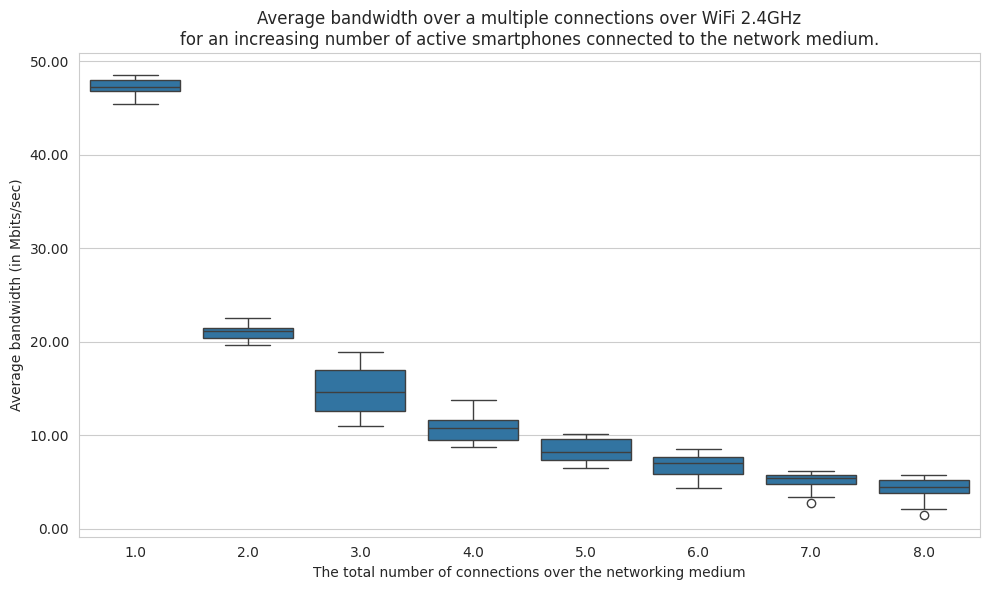

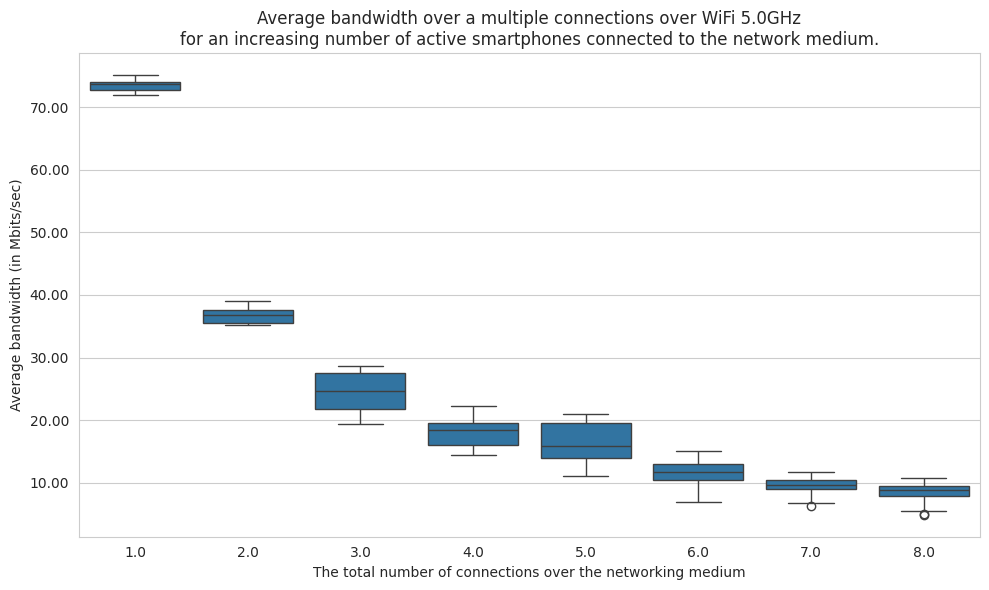

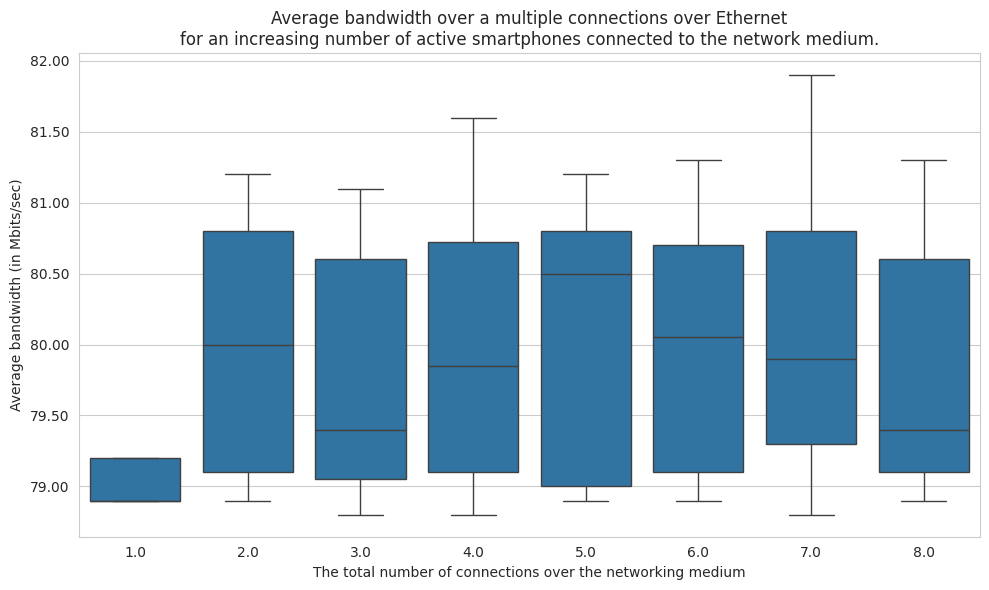

In [113]:
# Generate graphs
save=True
showfliers=True
network_mediums = ["WiFi 2.4GHz", "WiFi 5.0GHz", "Ethernet"]
network_mediums_raw = ["wifi_2_4", "wifi_5_0", "ethernet"]
input_files = []
output_files = []
for nm in network_mediums_raw:
    in_f = "mult_conn_bandwidth_" + nm + "_results.csv"
    ou_f = "average_bandwidth_for_multiple_connections_increasing_devices_over_" + nm + "_graph"
    input_files.append(in_f)
    output_files.append(ou_f)

for i in range(len(network_mediums)):
    generate_mutliple_connections_average_bandwidth_graph(input_files[i], output_files[i], network_mediums[i], save, showfliers)

#### Bandwidth per connection for multiple connections

In [114]:
def generate_mutliple_connections_bandwidth_per_connection_graph(input_file, output_file, network_medium, save=False, showfliers=True):
    # Generate graph
    df = pd.read_csv(path_to_results + input_file)
    mask = df['n_devices'].isin([2, 4, 8, 12, 16])
    df = df[mask]
    df["n_devices"] = df["n_devices"] /2

    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    sns.boxplot(data=df, x='n_devices', y='bandwidth_mbits_sec', hue='n_connections', palette='Dark2', showfliers=showfliers)
    plt.title(f"Bandwidth per connection for a multiple connections over {network_medium}\nfor an increasing number of active smartphones connected to the network medium.")
    plt.xlabel('The total number of connections over the networking medium')
    plt.ylabel('Average bandwidth (in Mbits/sec)')
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.tight_layout()

    if save:
        if not os.path.exists(path_to_graphs):
            os.makedirs(path_to_graphs)
        plt.savefig(os.path.join(path_to_graphs, output_file + ".pdf"))
        plt.savefig(os.path.join(path_to_graphs, output_file + ".png"))

    plt.show()

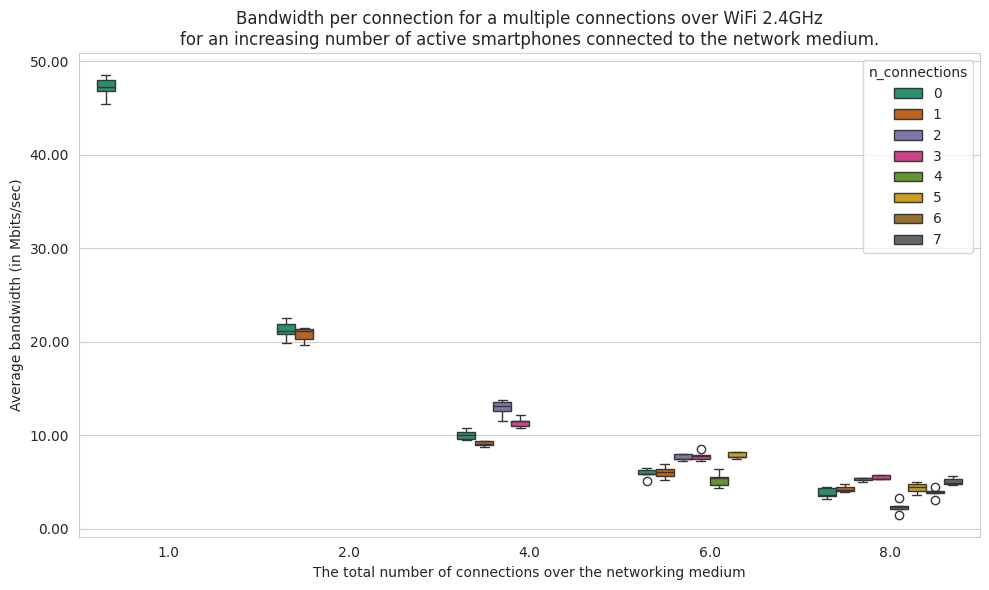

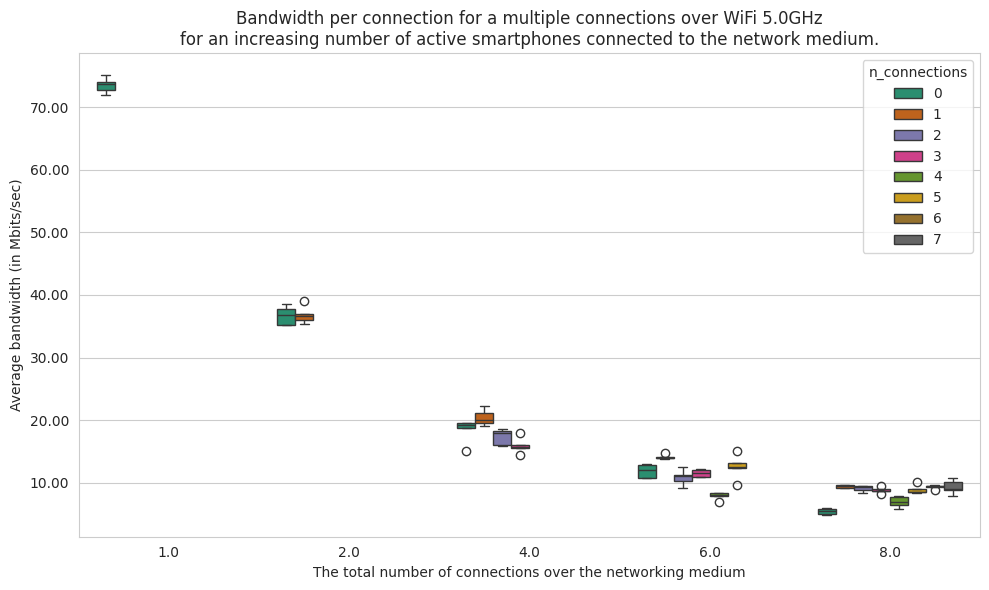

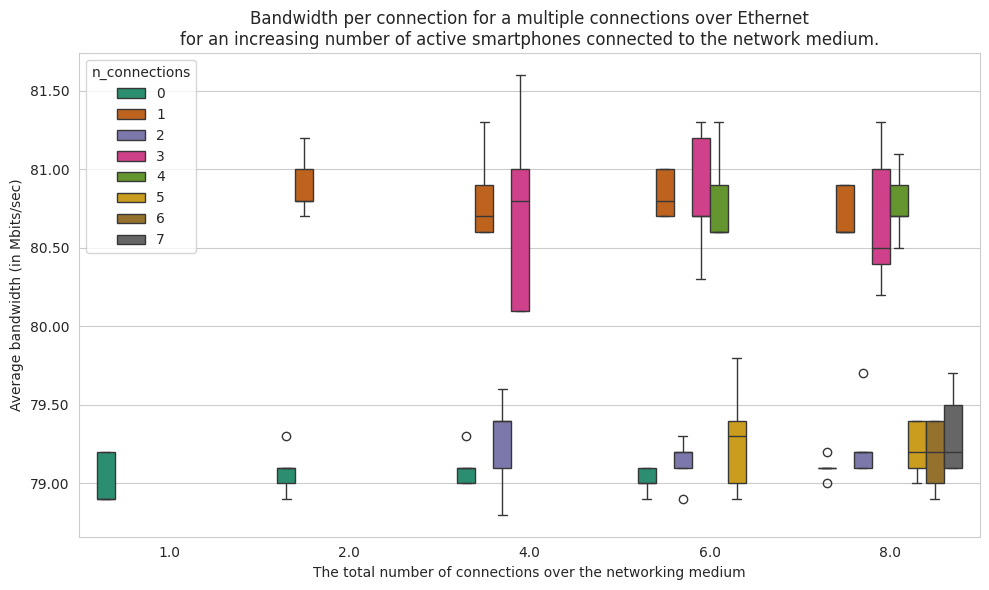

In [115]:
# Generate graphs
save=True
showfliers=True
network_mediums = ["WiFi 2.4GHz", "WiFi 5.0GHz", "Ethernet"]
network_mediums_raw = ["wifi_2_4", "wifi_5_0", "ethernet"]
input_files = []
output_files = []
for nm in network_mediums_raw:
    in_f = "mult_conn_bandwidth_" + nm + "_results.csv"
    ou_f = "per_connection_bandwidth_for_multiple_connections__over_" + nm + "_graph"
    input_files.append(in_f)
    output_files.append(ou_f)

for i in range(len(network_mediums)):
    generate_mutliple_connections_bandwidth_per_connection_graph(input_files[i], output_files[i], network_mediums[i], save, showfliers)

### Latency

#### Between the same device than the workload

As for the experiment with multiple ping intervals, when the medium was a smartphone hotspot, there where better latency for connections that already have a workload.

In [116]:
def generate_mutliple_connections_average_latency_same_device_graph(input_file, output_file, network_medium, save=False, showfliers=True):
    # Generate graph
    df = pd.read_csv(path_to_results + input_file)
    df["n_devices"] = df["n_devices"] /2

    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    sns.boxplot(data=df, x='n_devices', y='latency_ms', showfliers=showfliers)
    plt.title(f"Average latency for multiple connections over {network_medium} with workload\nfor an increasing number of active smartphones connected to the network medium.\n(Same connections than those with worlkload)")
    plt.xlabel('The total number of connections over the networking medium')
    plt.ylabel('Average latency (in ms)')
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.tight_layout()

    if save:
        if not os.path.exists(path_to_graphs):
            os.makedirs(path_to_graphs)
        plt.savefig(os.path.join(path_to_graphs, output_file + ".pdf"))
        plt.savefig(os.path.join(path_to_graphs, output_file + ".png"))

    plt.show()

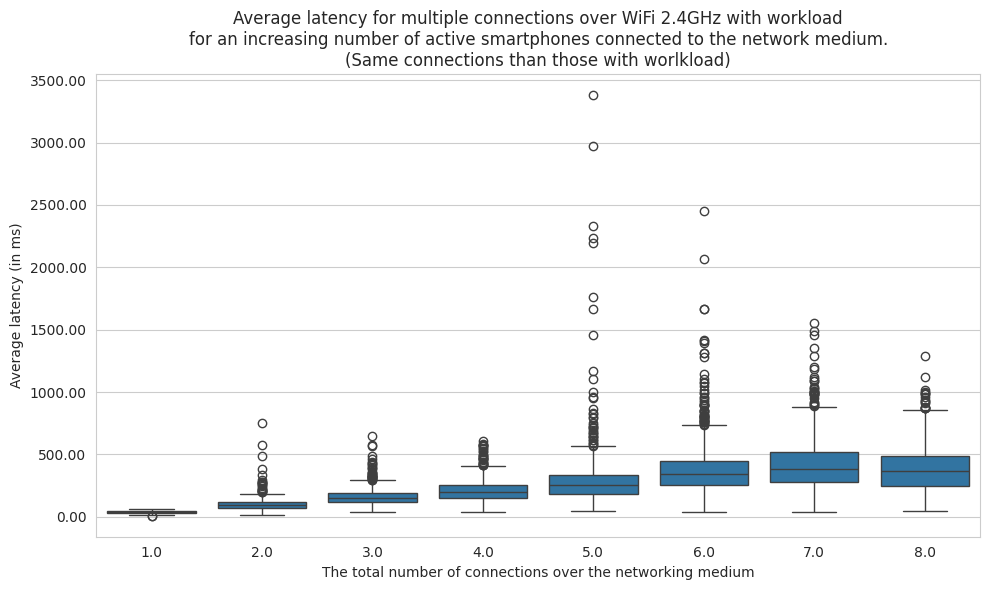

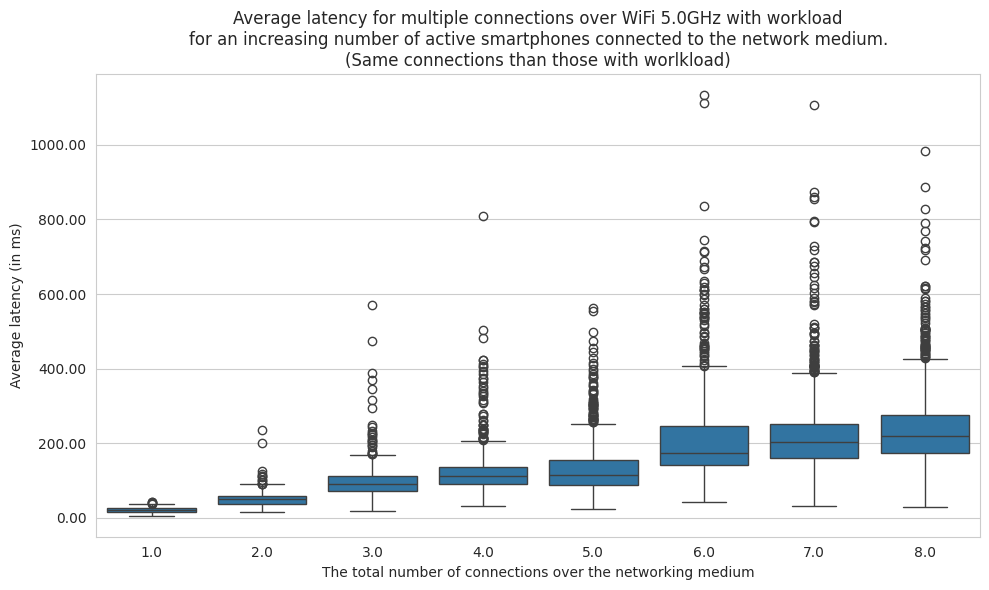

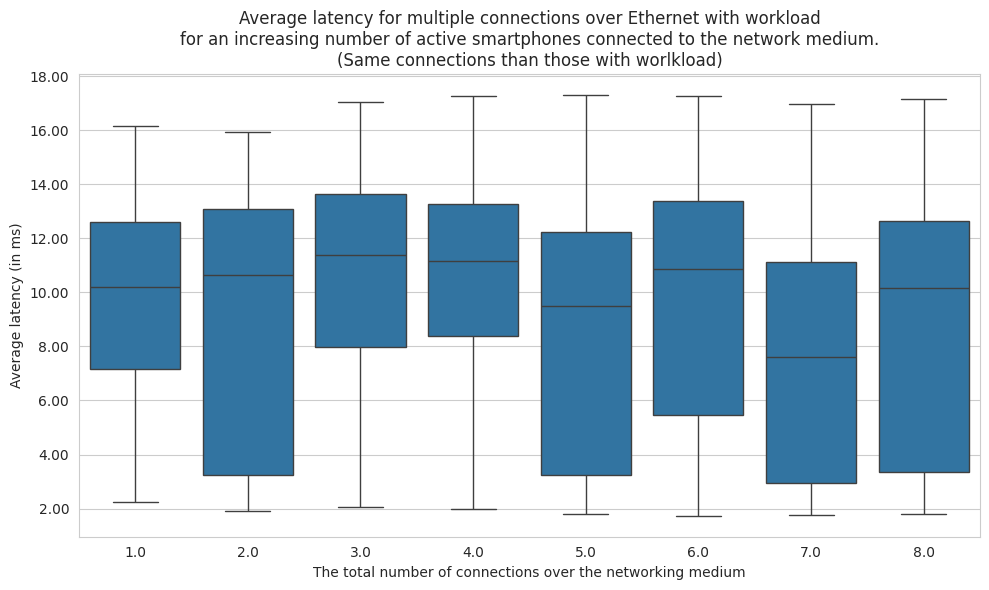

In [117]:
# Generate graphs
save=True
showfliers=True
network_mediums = ["WiFi 2.4GHz", "WiFi 5.0GHz", "Ethernet"]
network_mediums_raw = ["wifi_2_4", "wifi_5_0", "ethernet"]
input_files = []
output_files = []
for nm in network_mediums_raw:
    in_f = "latency_mult_con_inc_dev_same_dev_" + nm + "_results.csv"
    ou_f = "average_latency_multiple_connection_same_devices_over_" + nm + "_graph"
    input_files.append(in_f)
    output_files.append(ou_f)

for i in range(len(network_mediums)):
    generate_mutliple_connections_average_latency_same_device_graph(input_files[i], output_files[i], network_mediums[i], save, showfliers)

#### Between different device than the workload

In [118]:
def generate_mutliple_connections_average_latency_different_device_graph(input_file, output_file, network_medium, save=False, showfliers=True):
    # Generate graph
    df = pd.read_csv(path_to_results + input_file)
    df["n_devices"] = df["n_devices"] /2

    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    sns.boxplot(data=df, x='n_devices', y='latency_ms', showfliers=showfliers)
    plt.title(f"Average latency for multiple connections over {network_medium} with workload\nfor an increasing number of active smartphones connected to the network medium.\n(Different connections than those with worlkload)")
    plt.xlabel('The total number of connections over the networking medium')
    plt.ylabel('Average latency (in ms)')
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.tight_layout()

    if save:
        if not os.path.exists(path_to_graphs):
            os.makedirs(path_to_graphs)
        plt.savefig(os.path.join(path_to_graphs, output_file + ".pdf"))
        plt.savefig(os.path.join(path_to_graphs, output_file + ".png"))

    plt.show()

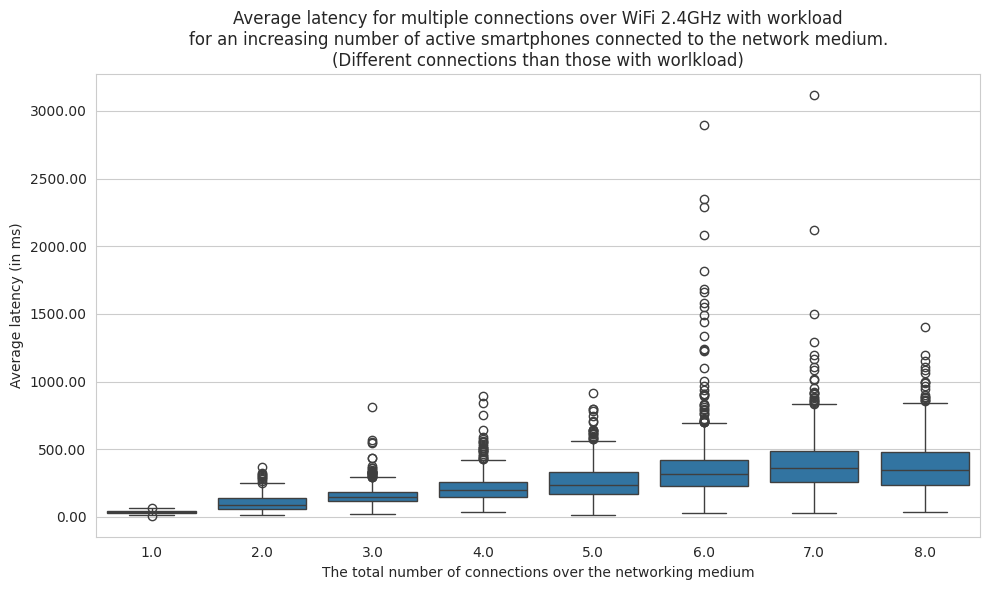

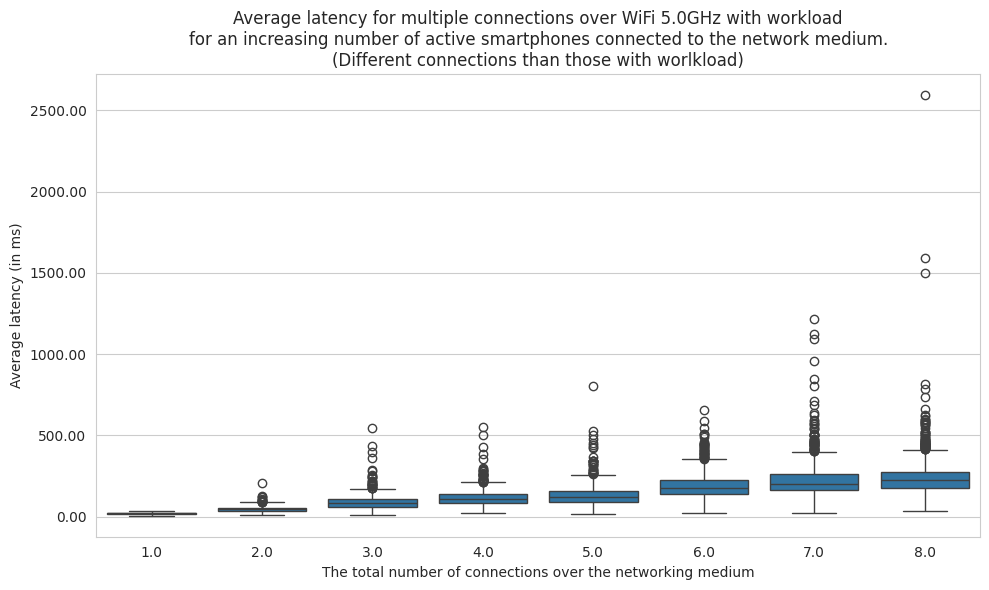

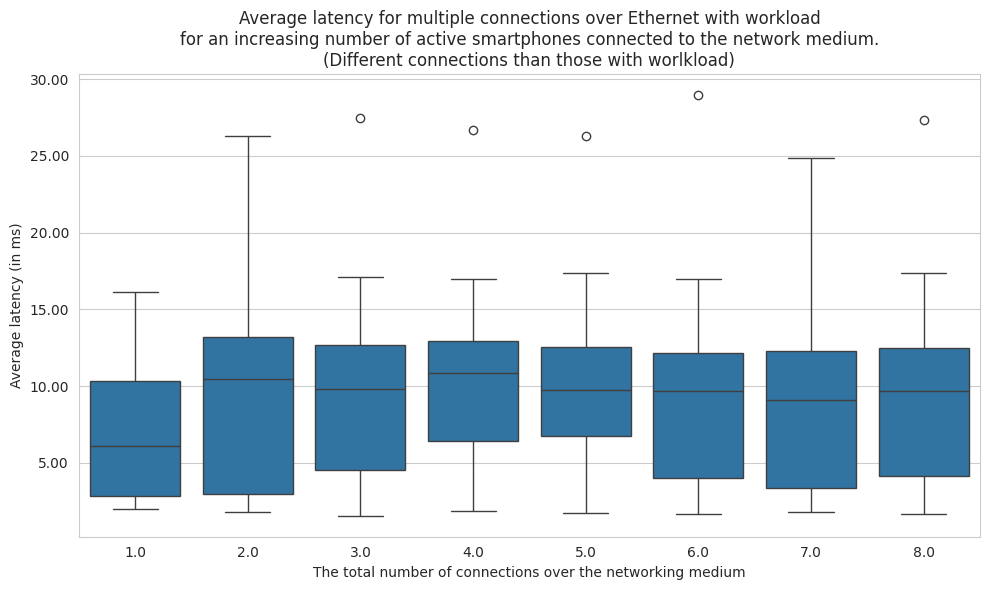

In [119]:
# Generate graphs
save=True
showfliers=True
network_mediums = ["WiFi 2.4GHz", "WiFi 5.0GHz", "Ethernet"]
network_mediums_raw = ["wifi_2_4", "wifi_5_0", "ethernet"]
input_files = []
output_files = []
for nm in network_mediums_raw:
    in_f = "latency_mult_con_inc_dev_diff_dev_" + nm + "_results.csv"
    ou_f = "average_latency_multiple_connection_different_devices_over_" + nm + "_graph"
    input_files.append(in_f)
    output_files.append(ou_f)

for i in range(len(network_mediums)):
    generate_mutliple_connections_average_latency_different_device_graph(input_files[i], output_files[i], network_mediums[i], save, showfliers)

#### Latency per connection for multiple connections

In [120]:
def generate_mutliple_connections_latency_per_connection_graph(input_file, output_file, network_medium, save=False, showfliers=True):
    # Generate graph
    df = pd.read_csv(path_to_results + input_file)
    mask = df['n_devices'].isin([2, 4, 8, 12, 16])
    df = df[mask]
    df["n_devices"] = df["n_devices"] /2

    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    sns.boxplot(data=df, x='n_devices', y='latency_ms', hue='n_connections', palette='Dark2', showfliers=showfliers)
    plt.title(f"Latency per connection for multiple connections over {network_medium} with workload\nfor an increasing number of active smartphones connected to the network medium.\n(Same connections than those with worlkload)")
    plt.xlabel('The total number of connections over the networking medium')
    plt.ylabel('Average latency (in ms)')
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.tight_layout()

    if save:
        if not os.path.exists(path_to_graphs):
            os.makedirs(path_to_graphs)
        plt.savefig(os.path.join(path_to_graphs, output_file + ".pdf"))
        plt.savefig(os.path.join(path_to_graphs, output_file + ".png"))

    plt.show()

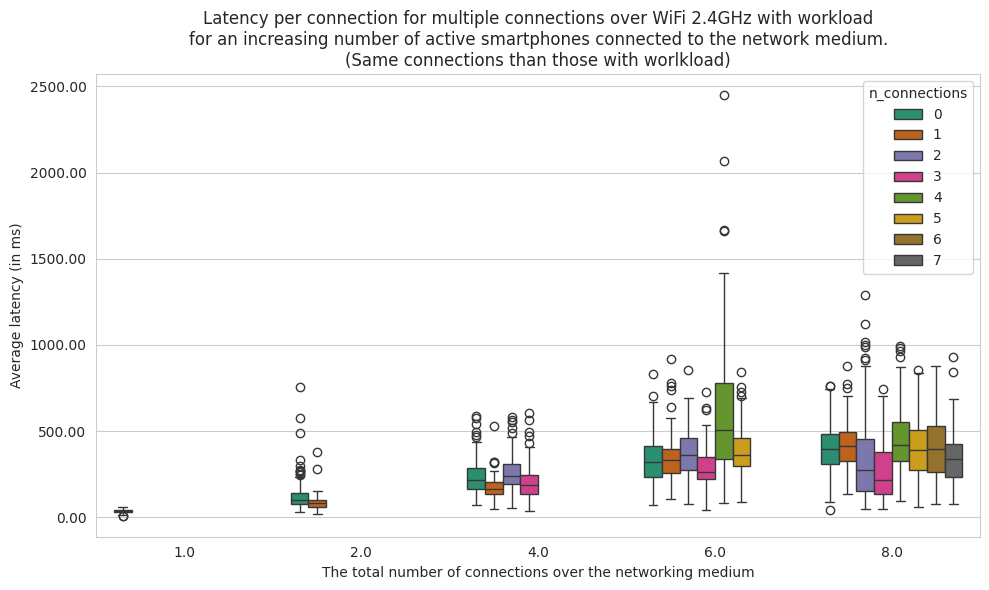

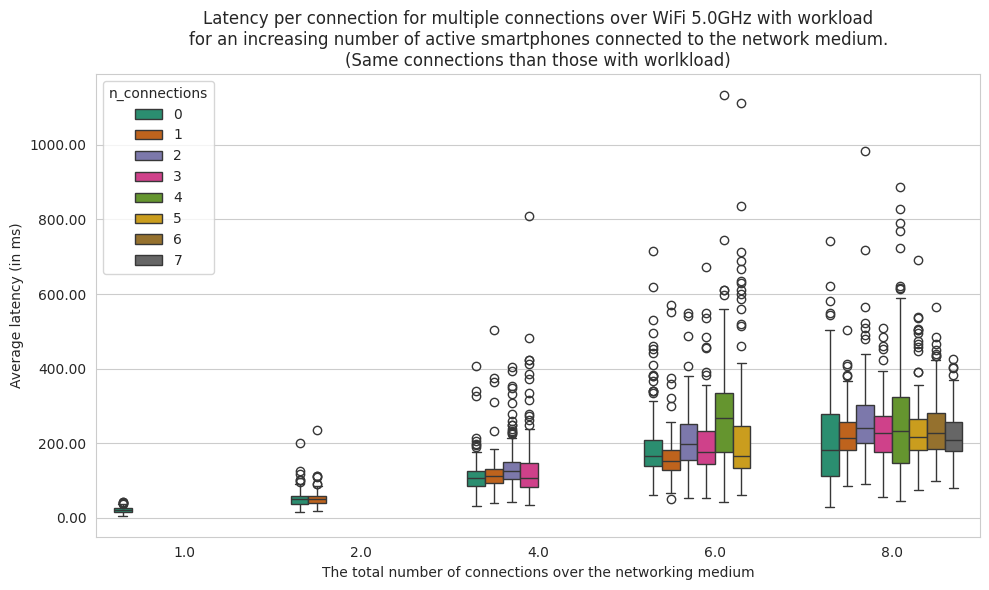

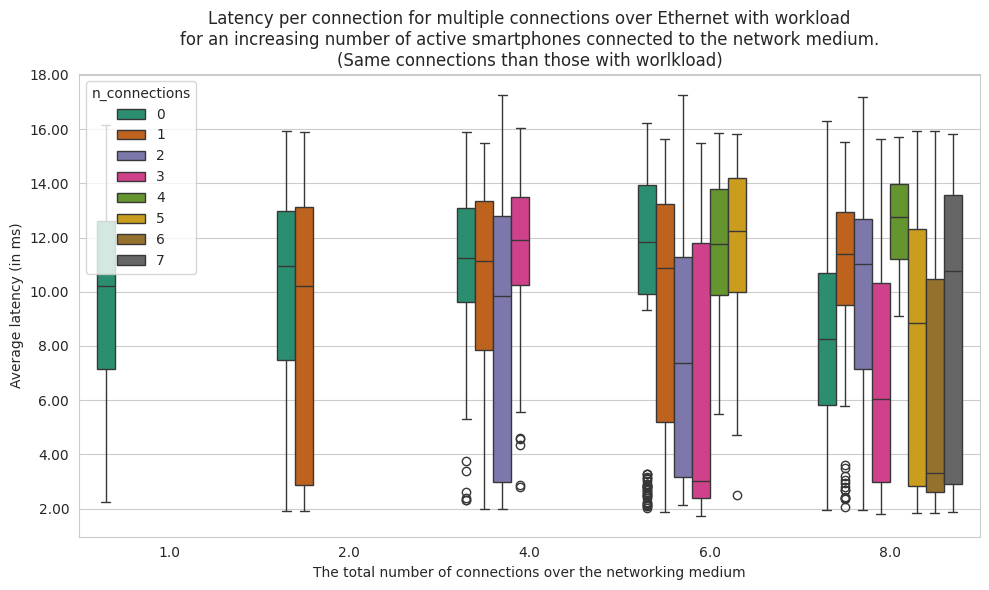

In [121]:
# Generate graphs
save=True
showfliers=True
network_mediums = ["WiFi 2.4GHz", "WiFi 5.0GHz", "Ethernet"]
network_mediums_raw = ["wifi_2_4", "wifi_5_0", "ethernet"]
input_files = []
output_files = []
for nm in network_mediums_raw:
    in_f = "latency_mult_con_inc_dev_same_dev_" + nm + "_results.csv"
    ou_f = "per_connection_latency_for_multiple_connections__over_" + nm + "_graph"
    input_files.append(in_f)
    output_files.append(ou_f)

for i in range(len(network_mediums)):
    generate_mutliple_connections_latency_per_connection_graph(input_files[i], output_files[i], network_mediums[i], save, showfliers)